# DATA ANALYSIS ON CARS DATA

  In this notebook i have analysed the amazon sales data for EDA to find the insights , data characteristics and plots .

In [1]:
# Installing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# Importing The Data
df = pd.read_csv("CARS_1.csv")

In [11]:
df.head(10)

,car_name,reviews_count,fuel_type,engine_displacement,no_cylinder,seating_capacity,transmission_type,fuel_tank_capacity,body_type,rating,starting_price,ending_price,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp
0,Maruti Alto K10,51,Petrol,998,3,5.0,Automatic,27.0,Hatchback,4.5,399000,583000,89.0,3500,65.71,5500
1,Maruti Brezza,86,Petrol,1462,4,5.0,Automatic,48.0,SUV,4.5,799000,1396000,136.8,4400,101.65,6000
2,Mahindra Thar,242,Diesel,2184,4,4.0,Automatic,57.0,SUV,4.5,1353000,1603000,300.0,2800,130.00,3750
3,Mahindra XUV700,313,Diesel,2198,4,7.0,Automatic,60.0,SUV,4.5,1318000,2458000,450.0,2800,182.38,3500
4,Mahindra Scorpio-N,107,Diesel,2198,4,7.0,Automatic,57.0,SUV,4.5,1199000,2390000,400.0,2750,172.45,3500
5,Toyota Fortuner,99,Diesel,2755,4,NaN,Automatic,80.0,SUV,4.5,3240000,4957000,500.0,2800,201.15,3400
6,Hyundai Creta,731,Diesel,1493,4,5.0,Automatic,50.0,SUV,4.5,1044000,1818000,250.0,2750,113.45,4000
7,Tata Punch,381,Petrol,1199,3,5.0,Automatic,37.0,SUV,4.5,593000,949000,113.0,3400,84.48,6000
8,Mahindra Bolero,107,Diesel,1498,3,7.0,Manual,60.0,SUV,4.5,933000,1026000,210.0,2200,74.96,3600
9,Maruti Swift,205,Petrol,1197,4,5.0,Automatic,37.0,Hatchback,4.0,592000,885000,113.0,4400,88.50,6000


In [12]:
df.shape

(203, 16)

In [13]:
# Data Discription
df.describe()

,reviews_count,engine_displacement,no_cylinder,seating_capacity,fuel_tank_capacity,rating,starting_price,ending_price,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp
count,203.000000,203.000000,203.000000,202.000000,203.000000,203.000000,2.030000e+02,2.030000e+02,203.000000,203.000000,203.000000,203.000000
mean,118.684729,2305.921182,4.709360,4.990099,46.143842,4.433498,9.443640e+06,1.112005e+07,402.804828,3346.507389,266.576995,4790.147783
std,314.331318,1493.837786,2.538664,1.171766,28.904207,0.280136,1.357035e+07,1.551746e+07,237.116638,1594.960077,193.474807,1990.876835
min,1.000000,0.000000,0.000000,2.000000,0.000000,3.000000,3.390000e+05,3.610000e+05,16.100000,0.000000,10.800000,0.000000
25%,5.000000,1339.500000,4.000000,5.000000,33.500000,4.500000,9.455000e+05,1.407500e+06,201.000000,2500.000000,108.555000,3800.000000
50%,14.000000,1991.000000,4.000000,5.000000,50.000000,4.500000,4.312000e+06,4.600000e+06,360.000000,3500.000000,187.740000,5500.000000
75%,83.000000,2996.000000,6.000000,5.000000,66.000000,4.500000,1.160000e+07,1.575000e+07,590.000000,4500.000000,384.870000,6000.000000
max,2392.000000,6750.000000,12.000000,8.000000,100.000000,5.000000,7.060000e+07,9.000000e+07,1020.000000,7000.000000,788.520000,8500.000000


In [14]:
df.dtypes

car_name                object
reviews_count            int64
fuel_type               object
engine_displacement      int64
no_cylinder              int64
seating_capacity       float64
transmission_type       object
fuel_tank_capacity     float64
body_type               object
rating                 float64
starting_price           int64
ending_price             int64
max_torque_nm          float64
max_torque_rpm           int64
max_power_bhp          float64
max_power_rp             int64
dtype: object

In [15]:
# Checking for missing values
df.isna().sum()

car_name               0
reviews_count          0
fuel_type              0
engine_displacement    0
no_cylinder            0
seating_capacity       1
transmission_type      0
fuel_tank_capacity     0
body_type              0
rating                 0
starting_price         0
ending_price           0
max_torque_nm          0
max_torque_rpm         0
max_power_bhp          0
max_power_rp           0
dtype: int64

In [16]:
#Missing Values imputation
from sklearn.impute import SimpleImputer

#Mean imputer
mean_imputer = SimpleImputer(missing_values=np.nan , strategy="mean")
df['seating_capacity']= pd.DataFrame(mean_imputer.fit_transform(df[['seating_capacity']]))
df['seating_capacity'].isna().sum()

0

In [17]:
# Finding Duplicate Values
df.duplicated().sum()

0

No Duplicate values

# Visualizations

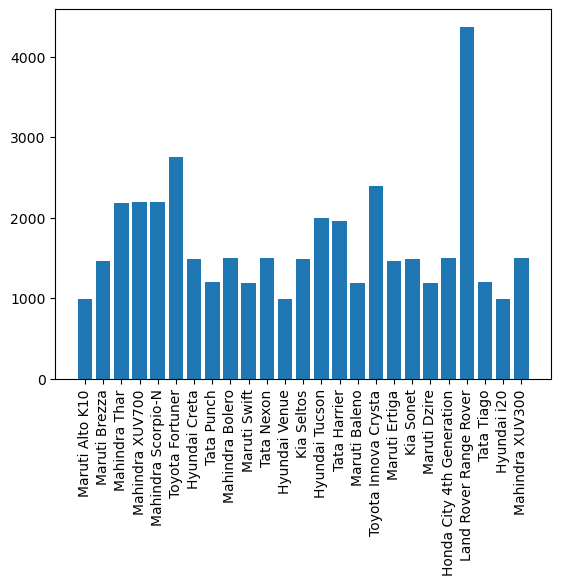

In [34]:
# Bar Graph 
plt.bar(x=df.car_name.head(25), height=df.engine_displacement.head(25))
plt.xticks(rotation=90)
plt.show()


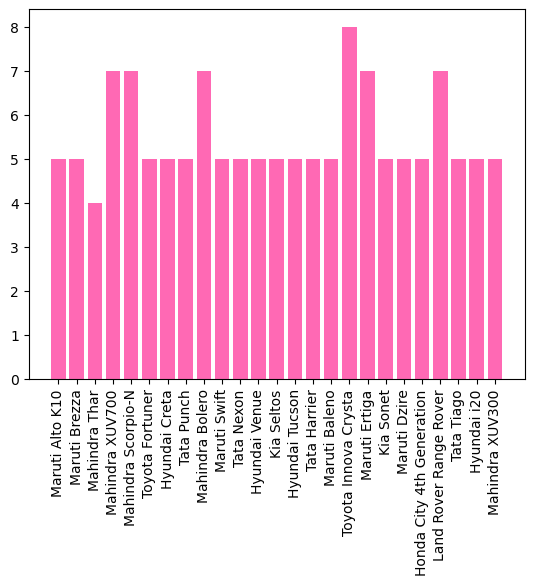

In [37]:
# Bar Graph 
plt.bar(x=df.car_name.head(25), height=df.seating_capacity.head(25), color="hotpink")
plt.xticks(rotation=90)
plt.show()

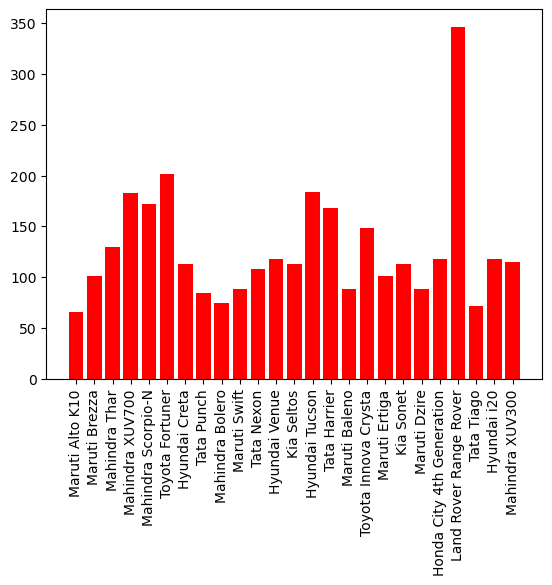

In [42]:
# Bar Graph 
plt.bar(x=df.car_name.head(25), height=df.max_power_bhp.head(25),color="red")
plt.xticks(rotation=90)
plt.show()

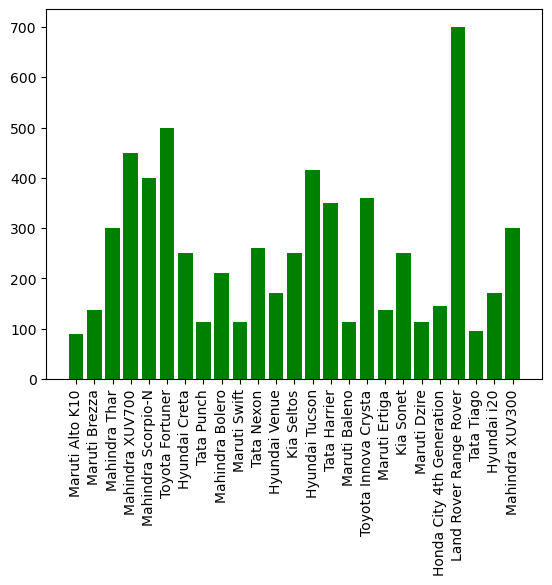

In [43]:
# Bar Graph 
plt.bar(x=df.car_name.head(25), height=df.max_torque_nm.head(25),color="green")
plt.xticks(rotation=90)
plt.show()

(array([160.,   0.,   0.,   0.,   0.,  29.,   0.,   0.,   0.,  14.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

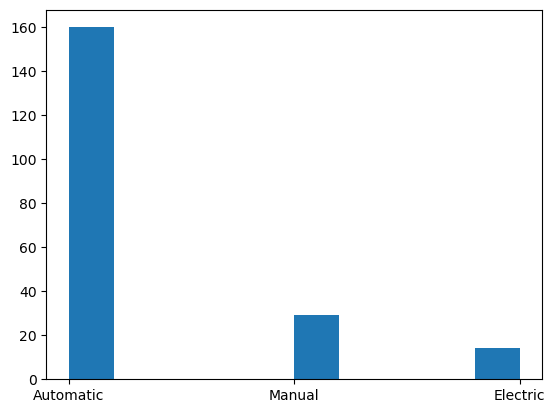

In [50]:
# Histogram
plt.hist(df.transmission_type)

(array([  1.,   0.,  10.,   0.,   0.,  11.,   0., 174.,   0.,   7.]),
 array([3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ]),
 <BarContainer object of 10 artists>)

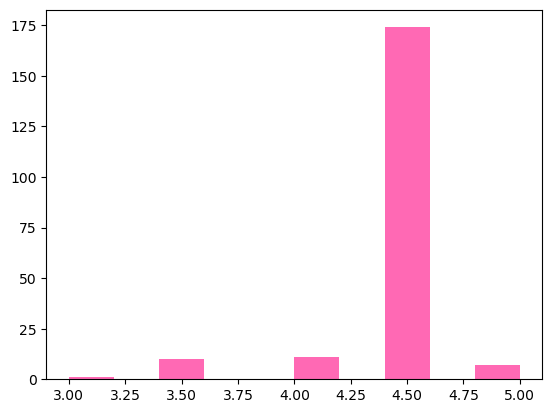

In [52]:
plt.hist(df.rating, color ="hotpink")

(array([125.,   0.,   0.,  55.,   0.,   0.,   7.,   0.,   0.,  16.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

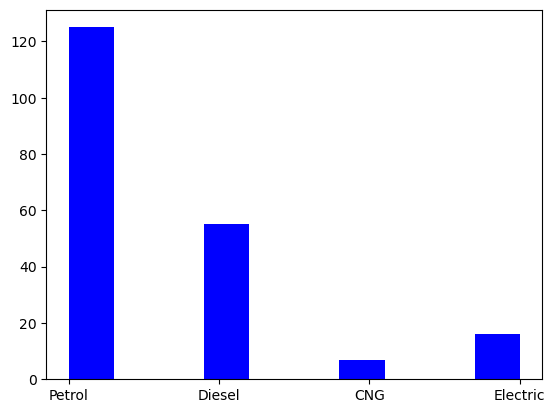

In [53]:
plt.hist(df.fuel_type, color ="blue")

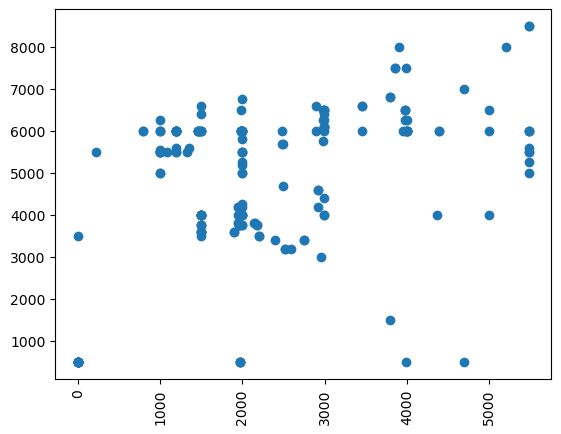

In [91]:
plt.scatter(x=df.engine_displacement, y=df.max_power_rp)
plt.xticks(rotation=90)
plt.show()

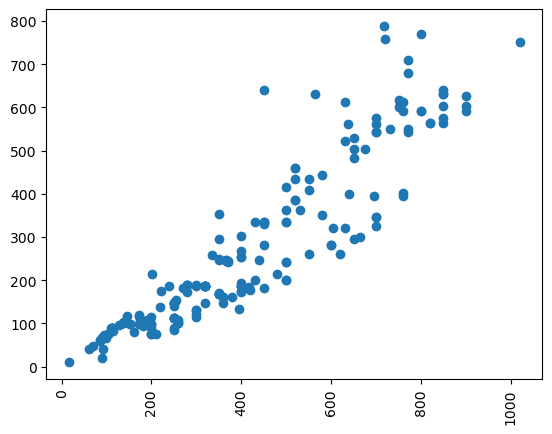

In [92]:
plt.scatter(x=df.max_torque_nm, y=df.max_power_bhp)
plt.xticks(rotation=90)
plt.show()

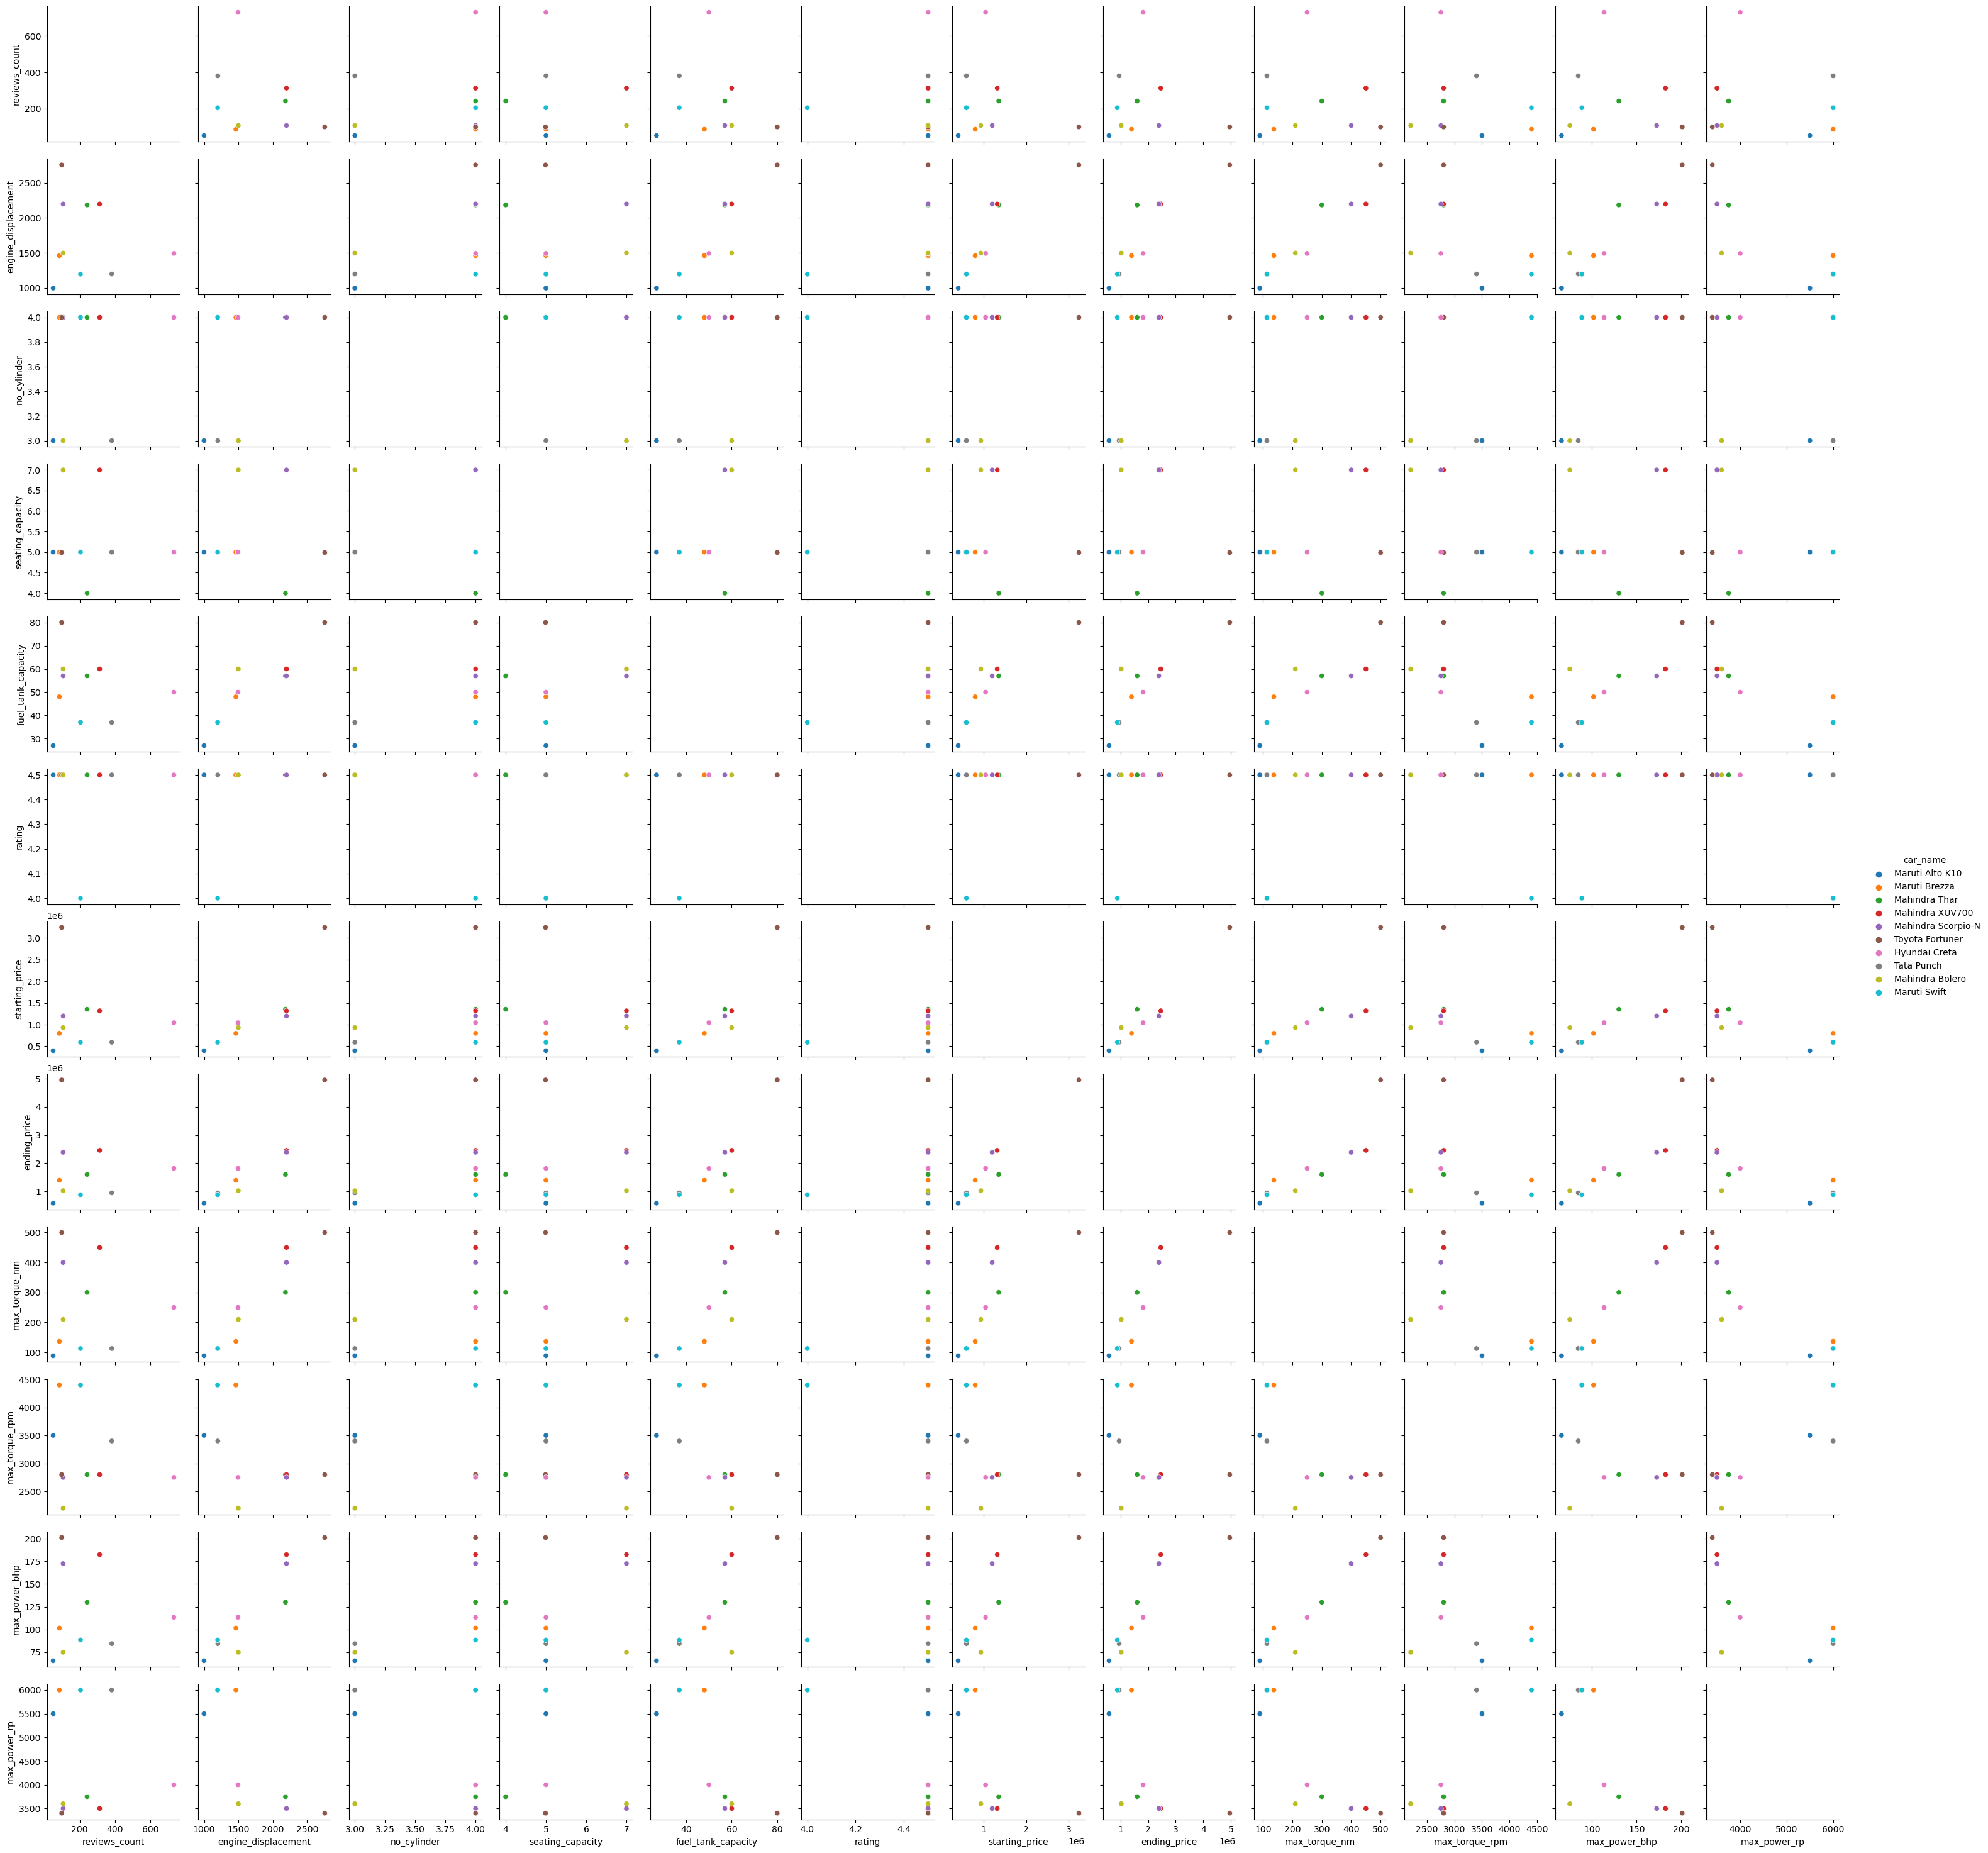

In [68]:
# Pair plot
import seaborn as sns
sns.pairplot(df.head(10), hue ='car_name')

{'whiskers': [<matplotlib.lines.Line2D at 0x27d6ae85fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x27d6ae985b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27d6ae85d60>],
 'medians': [<matplotlib.lines.Line2D at 0x27d6ae98b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x27d6ae98e20>],
 'means': []}

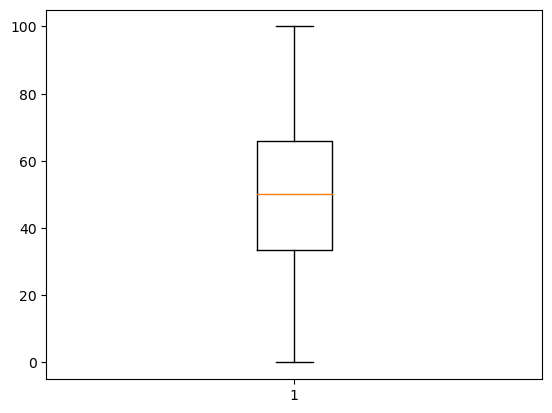

In [71]:
#boxplot
plt.boxplot(df.fuel_tank_capacity )

{'whiskers': [<matplotlib.lines.Line2D at 0x27d6ade1640>,
 'caps': [<matplotlib.lines.Line2D at 0x27d6ade1be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27d6ade1490>],
 'medians': [<matplotlib.lines.Line2D at 0x27d6adee1c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x27d6adee490>],
 'means': []}

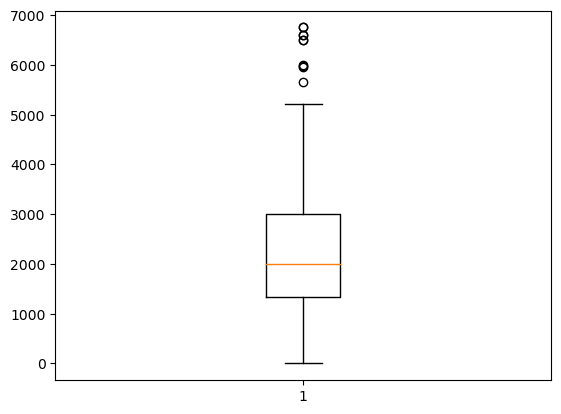

In [72]:
#boxplot
plt.boxplot(df.engine_displacement)

In [73]:
#  CAtegorical variable transform with Label Encoding
from sklearn.preprocessing import LabelEncoder

In [74]:
le = LabelEncoder()

In [75]:
df["car_name"] = le.fit_transform(df["car_name"])
df["fuel_type"] = le.fit_transform(df["fuel_type"])
df["body_type"] = le.fit_transform(df["body_type"])
df["transmission_type"] = le.fit_transform(df["transmission_type"])

In [76]:
df.head(10)

,car_name,reviews_count,fuel_type,engine_displacement,no_cylinder,seating_capacity,transmission_type,fuel_tank_capacity,body_type,rating,starting_price,ending_price,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp
0,106,51,3,998,3,5.000000,0,27.0,2,4.5,399000,583000,89.0,3500,65.71,5500
1,108,86,3,1462,4,5.000000,0,48.0,8,4.5,799000,1396000,136.8,4400,101.65,6000
2,101,242,1,2184,4,4.000000,0,57.0,8,4.5,1353000,1603000,300.0,2800,130.00,3750
3,103,313,1,2198,4,7.000000,0,60.0,8,4.5,1318000,2458000,450.0,2800,182.38,3500
4,100,107,1,2198,4,7.000000,0,57.0,8,4.5,1199000,2390000,400.0,2750,172.45,3500
5,185,99,1,2755,4,4.990099,0,80.0,8,4.5,3240000,4957000,500.0,2800,201.15,3400
6,52,731,1,1493,4,5.000000,0,50.0,8,4.5,1044000,1818000,250.0,2750,113.45,4000
7,179,381,3,1199,3,5.000000,0,37.0,8,4.5,593000,949000,113.0,3400,84.48,6000
8,92,107,1,1498,3,7.000000,2,60.0,8,4.5,933000,1026000,210.0,2200,74.96,3600
9,117,205,3,1197,4,5.000000,0,37.0,2,4.0,592000,885000,113.0,4400,88.50,6000


In [81]:
df.columns

Index(['car_name', 'reviews_count', 'fuel_type', 'engine_displacement',
       'no_cylinder', 'seating_capacity', 'transmission_type',
       'fuel_tank_capacity', 'body_type', 'rating', 'starting_price',
       'ending_price', 'max_torque_nm', 'max_torque_rpm', 'max_power_bhp',
       'max_power_rp'],
      dtype='object')

In [79]:
# Outliers removal with Winsorization
from feature_engine.outliers import Winsorizer

In [83]:
winsor = Winsorizer(capping_method='iqr',
                   fold =1.5,
                   tail="both",
                   variables=['car_name', 'reviews_count', 'fuel_type', 'engine_displacement',
       'no_cylinder', 'seating_capacity', 'transmission_type',
       'fuel_tank_capacity', 'body_type', 'rating', 'starting_price',
       'ending_price', 'max_torque_nm', 'max_torque_rpm', 'max_power_bhp',
       'max_power_rp'])

In [84]:
df = winsor.fit_transform(df[['car_name', 'reviews_count', 'fuel_type', 'engine_displacement',
       'no_cylinder', 'seating_capacity', 'transmission_type',
       'fuel_tank_capacity', 'body_type', 'rating', 'starting_price',
       'ending_price', 'max_torque_nm', 'max_torque_rpm', 'max_power_bhp',
       'max_power_rp']])

{'whiskers': [<matplotlib.lines.Line2D at 0x27d70ff5fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x27d7100f580>,
 'boxes': [<matplotlib.lines.Line2D at 0x27d70ff5ca0>],
 'medians': [<matplotlib.lines.Line2D at 0x27d7100fb20>],
 'fliers': [<matplotlib.lines.Line2D at 0x27d7100fdf0>],
 'means': []}

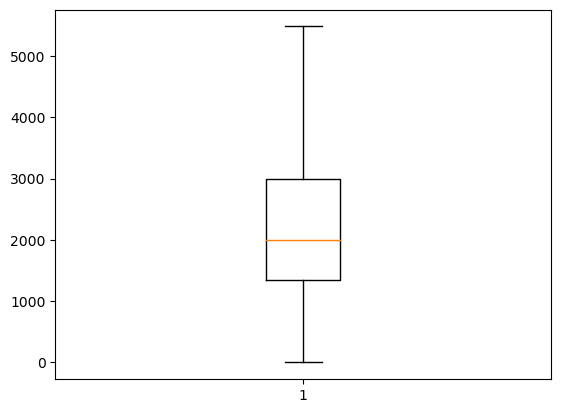

In [85]:
plt.boxplot(df.engine_displacement)

All the outliers are removed from the data

SyntaxError: invalid syntax (4280104726.py, line 4)

In [105]:
from sklearn.preprocessing import MinMaxScaler

In [112]:
sc = MinMaxScaler()
df = sc.fit_transform(df)

In [113]:
df

array([[0.53535354, 0.25125628, 1.        , ..., 0.5       , 0.07060382,
        0.625     ],
       [0.54545455, 0.42713568, 1.        , ..., 0.62857143, 0.11681582,
        0.6875    ],
       [0.51010101, 1.        , 0.33333333, ..., 0.4       , 0.15326853,
        0.40625   ],
       ...,
       [0.44949495, 0.00502513, 0.33333333, ..., 0.35714286, 0.20170498,
        0.40625   ],
       [0.03535354, 0.04020101, 1.        , ..., 0.64285714, 0.74652831,
        0.6875    ],
       [0.53030303, 0.01507538, 1.        , ..., 0.5       , 0.04697063,
        0.6875    ]])